# Hiding data in images using Python
*Part 1 of a Multi‑Part Series on Steganography*

## What Is Steganography?
Steganography (from Greek στεγανός, *steganos*, “covered”) is the science, or even art, of hiding messages inside ordinary-looking carriers so that no one even suspects the presence of a secret. Unlike cryptography, which scrambles the content of a message to make it unreadable, steganography conceals **the very fact** that a message exists.  

Common stego‑carriers include images, videos, audios, and network traffic.
Applications range from watermarking copyrighted media to covert communication in high‑risk environments, e.g. journalism.

---

## Why LSB Steganography?
The **Least Significant Bit (LSB)** technique is THE simplest and most widely used—methods of image steganography. 
It uses the fact that the small changes in pixel's color values produce an imperceptible change to the human eye.
**Key Advantages**  
- **Simplicity:** Easy to implement in code.  
- **Capacity:** Can hide a significant amount of data, depending on image size.  
- **Invisibility:** Minor bit‑level changes are visually undetectable.  

---

## How LSB Works
Digital images typically encode each pixel as three color channels: Red, Green, and Blue. Each represented by an 8‑bit integer (0–255). The LSB stego‑algorithm replaces the least significant bit of each channel with bits from your secret payload:

```

Original channel byte:  10101100  (172)
After replacing LSB:    10101101  (173)

````

Because only the very last bit changes, the color difference is negligible:

- **∆=1/256** of the channel’s full range  
- Human vision cannot reliably detect such tiny shifts  

By iterating through pixels and channels, you can embed large binary payloads.

---

## Getting Started: Prerequisites & Installation
Install the required libraries:


In [7]:
!pip install pillow stegosphere

Defaulting to user installation because normal site-packages is not writeable


* **Pillow** for image I/O
* **Stegosphere** for high‑level steganography routines

* Check-out the library [here](https://github.com/Maximilian-Koch/stegosphere)!
---

## Extracting Hidden Data from an Image

We’ll use a small test image (`logo_small_stego.png`) that already contains a hidden message.

In [8]:
from stegosphere import image, binary_to_data
from stegosphere.embeddings import LSB

# 1. Load image & read pixel matrix
img = image.ImageContainer("logo_small_stego.png")
pixels = img.read()

# 2. Extract raw bit payload
bits = LSB.extract(pixels)
print("First 10 bits:", bits[:10])

# 3. Convert binary payload to text
print(binary_to_data(bits).decode())

First 10 bits: 0101011101
Welcome to stegosphere! This payload is hidden inside of the logo using Least Significant Bit steganography!
Stegosphere is a versatile library for both applying steganography (hiding data within media) and performing steganalysis (detecting hidden data).
It provides a flexible framework for any data representable as a NumPy array, including images, videos, audio and TTF fonts.
Furthermore, multi-file embedding, Hamming codes, payload compression and encryption are available,
as well as a research toolbox for evaluating method performance and security.


**What’s Happening?**

* `ImageContainer.read()` returns a NumPy array of shape `(height, width, 3)`.
* `LSB.extract(...)` scans every pixel channel’s LSB to rebuild the bitstream.
* `binary_to_data(...)` stitches bits into bytes and decodes to UTF‑8 text.

---

## Embedding Your Own Secret Message

Next, we’ll hide our own payload in a clean image (`logo_small.png`).

In [9]:
from stegosphere import image, binary_to_data
from stegosphere.embeddings import LSB

# 1. Load cover image
img = image.ImageContainer("logo_small.png")
pixels = img.read()

# 2. Check embedding capacity (in bits)
capacity = LSB.max_capacity(pixels)
print(f"Max capacity: {capacity} bits")

# 3. Embed payload
payload = "This is a secret payload, hidden with LSB!"
stego_pixels = LSB.embed(pixels, payload)

# 5. Save the stego‑image
img.save("stego_lsb.png", stego_pixels)

Max capacity: 196608 bits



**Key Points**

* Verify your message size **does not exceed** `LSB.max_capacity()`.
* Payload bytes are automatically converted to bits internally.
* The result is a new image (`stego_lsb.png`) visually identical to the original.

---

## Visualizing the Changes

To reassure ourselves that LSB tweaks are invisible, we can render the original and steg‑image side by side:

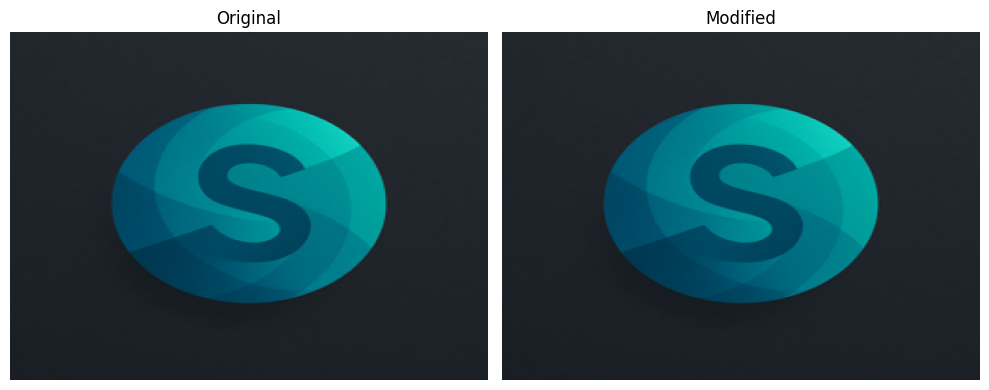

In [10]:
from stegosphere.analysis import visualizer

visualizer.show_side_by_side(pixels, stego_pixels)


> **Observation:** No perceptible difference! Even if you zoom in, pixel‑level changes are indistinguishable.

---

## Wrapping Up & What’s Next

In this first tutorial, you learned:

* The fundamentals of **steganography**
* How **LSB embedding** hides bit‑level data in images
* Using **Stegosphere** to **extract**, **embed**, and **visualize** hidden messages

**Up Next (Part 2):**
As soon as part 2 is published, it will be linked here.

Stay tuned!